# **Week 1-2**: Data Acquisition & Exploratory Analysis

Acquire and merge IPL datasets (ball-by-ball, match summaries).Here i have used **IPL Ball By Ball 2008 to 2025** dataset from kaggle.com , [click here ](https://www.kaggle.com/datasets/dgsports/ipl-ball-by-ball-2008-to-2022/data)to see the dataset.




In [ ]:
import pandas as pd
ball_by_ball = pd.read_csv("IPL_ball_by_ball_updated.csv")
matches = pd.read_csv("matches_updated_ipl_upto_2025.csv")

print("Size of ball_by_ball.csv is : ", ball_by_ball.shape)
print("Size of matches.csv is : ", matches.shape)

print("Columns in ball_by_ball.csv are : ", ball_by_ball.columns)
print("Columns in matches.csv are : ", matches.columns)

#merge the Dataframe:

matches = matches.rename(columns={'matchId': 'match_id'})

# Select only required match-level columns
match_cols = [
    'match_id',
    'team1',
    'team2',
    'toss_winner',
    'toss_decision',
    'neutralvenue',
    'winner',
    'match_number',
    'city',
    'winner_runs',
    'player_of_match'
]

# Merge safely
df = ball_by_ball.merge(
    matches[match_cols],
    on='match_id',
    how='left'
)

# Check result
df.head(5)

print("Size of df is : ", df.shape)

print("Columns in df are : ", df.columns)

#save our dataframe

df.to_csv("merged_dataset_IPL_match_prediction.csv",index=False)



Size of ball_by_ball.csv is :  (243815, 22)
Size of matches.csv is :  (1169, 28)
Columns in ball_by_ball.csv are :  Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')
Columns in matches.csv are :  Index(['season', 'venue', 'event', 'winner_runs', 'umpire2', 'toss_winner',
       'date', 'neutralvenue', 'umpire1', 'city', 'reserve_umpire', 'winner',
       'eliminator', 'date1', 'method', 'team1', 'toss_decision', 'gender',
       'team2', 'balls_per_over', 'winner_wickets', 'tv_umpire',
       'player_of_match', 'match_referee', 'outcome', 'date2', 'match_number',
       'matchId'],
      dtype='object')
Size of df is :  (243815, 32)
Columns in df are :  Index(['match_id', 'season', 'start_date

Inspect data schema, quality, and distributions.

In [ ]:
df=pd.read_csv("merged_dataset_IPL_match_prediction.csv",
    low_memory=False)

print("Shape: (row x columns)",df.shape)

#display dataset schema and quality
df.info()

#display distibution.
df.describe()

Shape: (row x columns) (243815, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243815 entries, 0 to 243814
Data columns (total 32 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   match_id                243815 non-null  int64  
 1   season                  243815 non-null  int64  
 2   start_date              243815 non-null  object 
 3   venue                   243815 non-null  object 
 4   innings                 243815 non-null  int64  
 5   ball                    243815 non-null  float64
 6   batting_team            243815 non-null  object 
 7   bowling_team            243815 non-null  object 
 8   striker                 243815 non-null  object 
 9   non_striker             243815 non-null  object 
 10  bowler                  243815 non-null  object 
 11  runs_off_bat            243815 non-null  int64  
 12  extras                  243815 non-null  int64  
 13  wides                   7652 non-null 

,match_id,season,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,match_number,winner_runs
count,2.438150e+05,243815.000000,243815.000000,243815.000000,243815.000000,243815.000000,7652.000000,1018.000000,628.000000,3778.000000,2.0,0.0,0.0,228877.000000,112809.000000
mean,8.707326e+05,2015.611119,1.483781,9.557662,1.252614,0.067174,1.204260,1.034381,1.867834,1.304129,5.0,NaN,NaN,31.107844,29.695122
std,3.532362e+05,4.650281,0.502855,5.686347,1.626764,0.341990,0.788406,0.325568,1.312454,0.847922,0.0,NaN,NaN,18.180938,26.322850
min,3.359820e+05,2008.000000,1.000000,0.100000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,1.000000,1.000000
25%,5.483160e+05,2012.000000,1.000000,4.500000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,16.000000,11.000000
50%,8.298190e+05,2015.000000,1.000000,9.400000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,31.000000,22.000000
75%,1.216507e+06,2020.000000,2.000000,14.400000,1.000000,0.000000,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN,46.000000,41.000000
max,1.370353e+06,2023.000000,6.000000,19.900000,6.000000,7.000000,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN,72.000000,146.000000


Clean data: handle missing values, normalize columns, ensure
date formats.

In [ ]:

# Ensure correct date format
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')


# Handle missing values


# Extras-related columns -> NaN means no extra on that delivery
extra_cols = ['wides', 'noballs', 'byes', 'legbyes', 'penalty']
df[extra_cols] = df[extra_cols].fillna(0)


# wicket_type NaN means no wicket
df['wicket_type'] = df['wicket_type'].fillna('No Wicket')

# Neutral venue -> missing means non-neutral
df['neutralvenue'] = df['neutralvenue'].fillna('False')

# Winner -> missing means no result / abandoned
df['winner'] = df['winner'].fillna('No Result')

# City -> missing city information
df['city'] = df['city'].fillna('Unknown')

# Match number -> missing for early seasons
df['match_number'] = df['match_number'].fillna(-1).astype(int)

# Winner runs -> NaN for matches won by wickets or no result
# Keep NaN (informative), no filling required
#we will handle it during feature engineering

#display columns
print(df.columns)
#other_player_dismissed has all values NaN so remove that column
df=df.drop(['other_player_dismissed'],axis=1)

#other_wicket_type has all values NaN so remove that column also
df=df.drop(['other_wicket_type'],axis=1)


#  Normalize categorical columns


#  Team name normalization
team_mapping = {
    'Delhi Daredevils': 'Delhi Capitals',
    'Kings XI Punjab': 'Punjab Kings',
    'Rising Pune Supergiant': 'Rising Pune Supergiants',
    'Gujarat Lions': 'Gujarat Titans'
}

team_cols = [
    'batting_team', 'bowling_team', 'team1', 'team2',
    'toss_winner', 'winner'
]

for col in team_cols:
    df[col] = df[col].replace(team_mapping)

#  Player name normalization (remove extra spaces)
df['player_dismissed']=df['player_dismissed'].fillna("No dismiss")
player_cols = [
    'striker', 'non_striker', 'bowler',
    'player_dismissed', 'player_of_match'
]

for col in player_cols:
    df[col] = df[col].astype(str).str.strip()

df.info()

# save cleaned data
df.to_csv("cleaned_dataset_IPL_match_prediction.csv",index=False)



Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'neutralvenue', 'winner', 'match_number', 'city',
       'winner_runs', 'player_of_match'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243815 entries, 0 to 243814
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   match_id          243815 non-null  int64         
 1   season            243815 non-null  int64         
 2   start_date        243815 non-null  datetime64[ns]
 3   venue             243815 non-null  object        
 4   innings           243815 non-null  int64         
 5   bal

EDA: distributions of runs, wickets, venue stats, team performance.

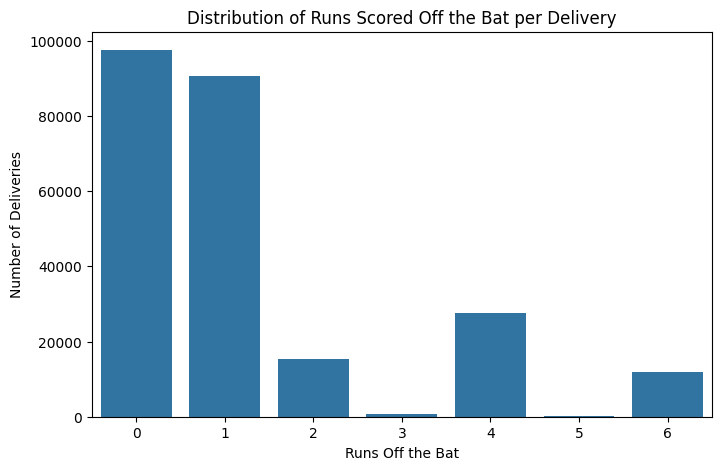

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("cleaned_dataset_IPL_match_prediction.csv",
    low_memory=False)

# Distribution of runs
plt.figure(figsize=(8,5))
sns.countplot(x='runs_off_bat', data=df)
plt.title("Distribution of Runs Scored Off the Bat per ball")
plt.xlabel("Runs Off the Bat")
plt.ylabel("Number of Deliveries")
plt.show()


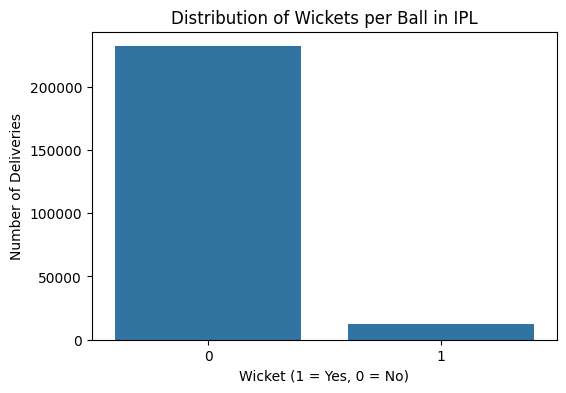

In [ ]:
# Create binary column for wickets
df['is_wicket'] = (df['wicket_type'] != 'No Wicket').astype(int)

#Distribution of wickets
plt.figure(figsize=(6,4))
sns.countplot(x='is_wicket', data=df)
plt.title("Distribution of Wickets per Ball in IPL")
plt.xlabel("Wicket (1 = Yes, 0 = No)")
plt.ylabel("Number of Deliveries")
plt.show()


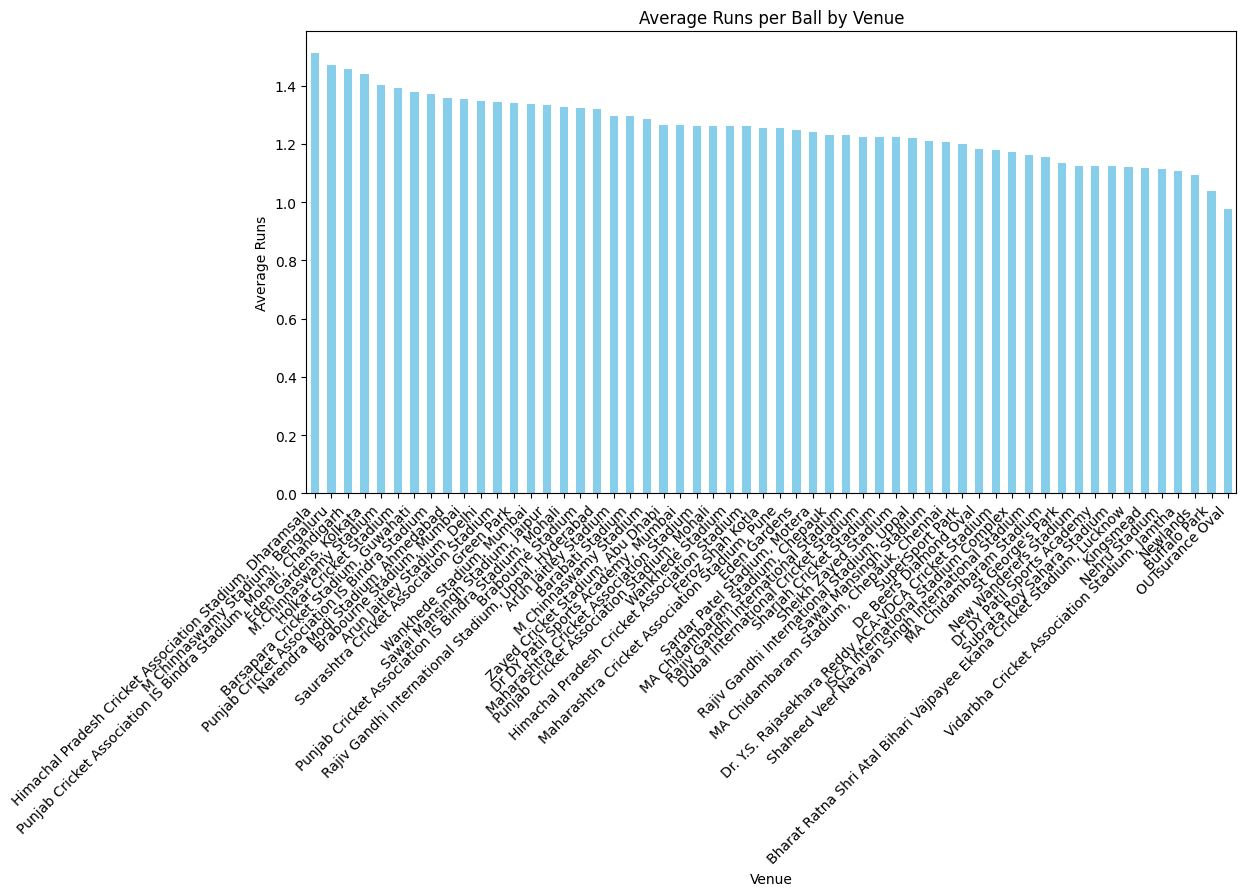

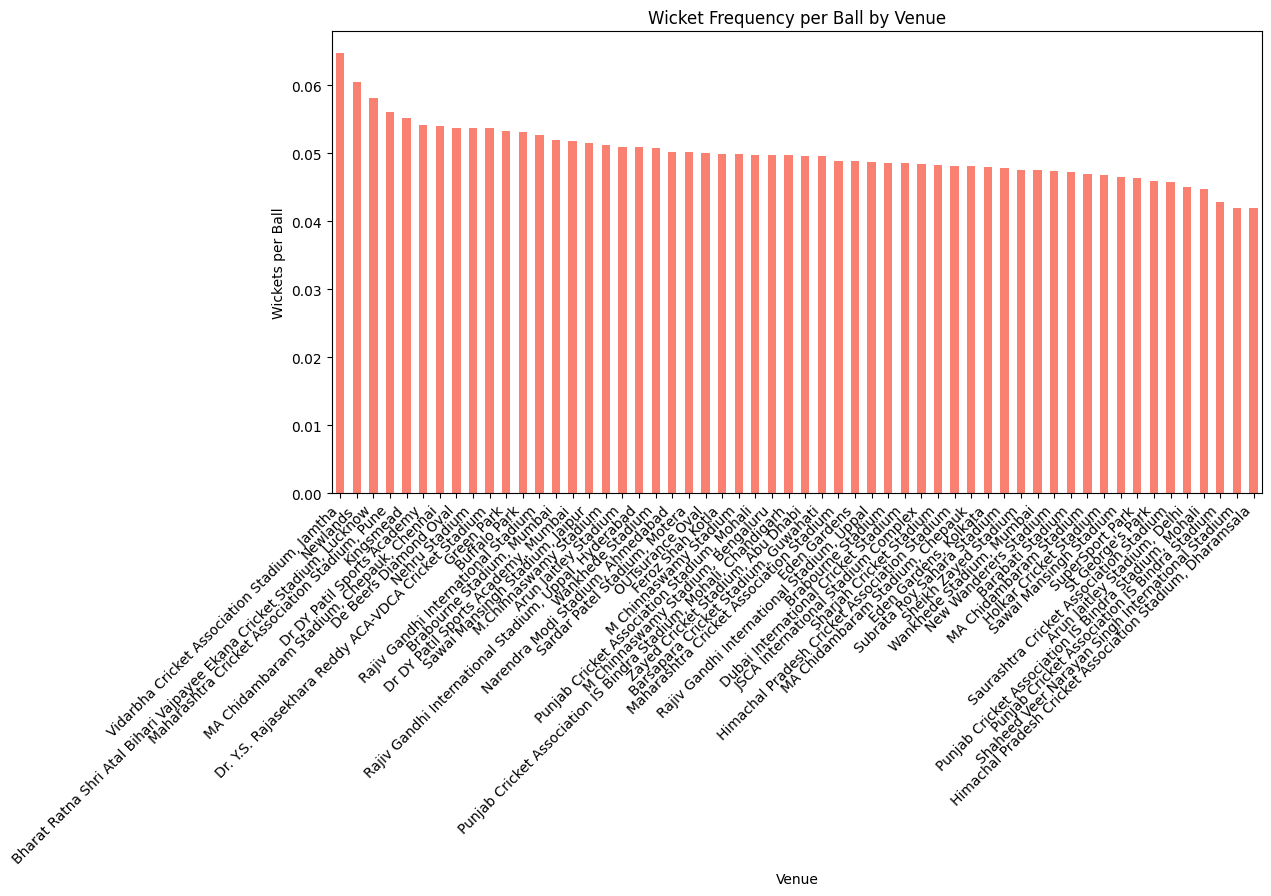

In [ ]:
# Average runs per ball by venue
venue_runs = df.groupby('venue')['runs_off_bat'].mean().sort_values(ascending=False)

# Average wicket rate per ball by venue
venue_wickets = df.groupby('venue')['is_wicket'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
venue_runs.plot(kind='bar', color='skyblue')
plt.title("Average Runs per Ball by Venue")
plt.xlabel("Venue")
plt.ylabel("Average Runs")
plt.xticks(rotation=45, ha='right')


plt.figure(figsize=(12,6))
venue_wickets.plot(kind='bar', color='salmon')
plt.title("Wicket Frequency per Ball by Venue")
plt.xlabel("Venue")
plt.ylabel("Wickets per Ball")
plt.xticks(rotation=45, ha='right')
plt.show()



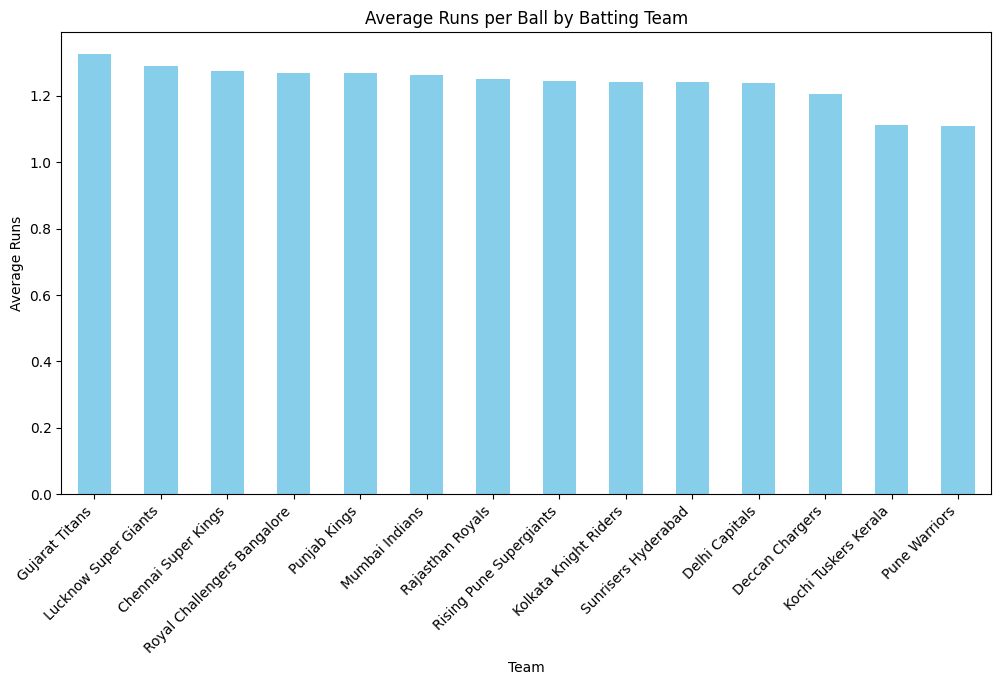

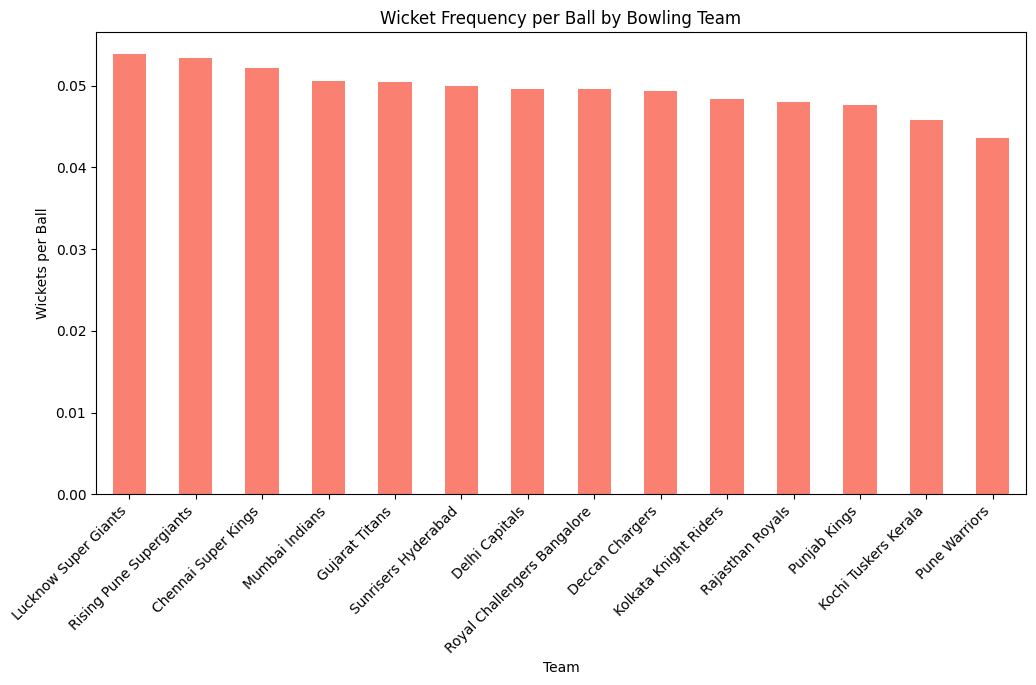

In [ ]:
# Average runs per ball by batting team
team_batting = df.groupby('batting_team')['runs_off_bat'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
team_batting.plot(kind='bar', color='skyblue')
plt.title("Average Runs per Ball by Batting Team")
plt.xlabel("Team")
plt.ylabel("Average Runs")
plt.xticks(rotation=45, ha='right')

# Average wickets per ball by bowling team
team_bowling = df.groupby('bowling_team')['is_wicket'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,6))
team_bowling.plot(kind='bar', color='salmon')
plt.title("Wicket Frequency per Ball by Bowling Team")
plt.xlabel("Team")
plt.ylabel("Wickets per Ball")
plt.xticks(rotation=45, ha='right')

plt.show()



# **Week 3-4**

Aggregate ball-by-ball to player-match level.


In [2]:
import pandas as pd
import numpy as np

# Load cleaned ball-by-ball data
df = pd.read_csv(
    "cleaned_dataset_IPL_match_prediction.csv",
    parse_dates=['start_date']
)

# Create wicket indicator (1 = wicket fell on this ball, else 0)
df['is_wicket'] = np.where(df['player_dismissed'] != 'No dismiss', 1, 0)

# Aggregate to player-match level
player_match = (
    df.groupby(
        ['match_id', 'start_date', 'venue', 'striker', 'batting_team'],
        as_index=False
    )
    .agg(
        runs_scored=('runs_off_bat', 'sum'),
        balls_faced=('ball', 'count'),
        fours=('runs_off_bat', lambda x: (x == 4).sum()),
        sixes=('runs_off_bat', lambda x: (x == 6).sum()),
        dismissed=('is_wicket', 'max')
    )
)


Engineer features: rolling averages (form), venue averages,
opponent-specific stats (PvT, PvP), career stats.

In [3]:
# Sort is mandatory for time-series features
player_match = player_match.sort_values(['striker', 'start_date'])


# Rolling average (last 5 matches)
player_match['avg_runs_last_5'] = (
    player_match
    .groupby('striker')['runs_scored']
    .rolling(window=5, min_periods=1)
    .mean()
    .reset_index(level=0, drop=True)
)


# Career average runs
player_match['career_avg_runs'] = (
    player_match
    .groupby('striker')['runs_scored']
    .transform('mean')
)


# Venue average (player at that venue)
player_match['venue_avg_runs'] = (
    player_match
    .groupby(['striker', 'venue'])['runs_scored']
    .transform('mean')
)


# 4️⃣ Player vs Team (PvT)
player_match['pvt_avg_runs'] = (
    player_match
    .groupby(['striker', 'batting_team'])['runs_scored']
    .transform('mean')
)


# Player vs Player (PvP) — calculated from ball data
pvp = (
    df.groupby(['striker', 'bowler'])['runs_off_bat']
      .mean()
      .rename('pvp_avg_runs')
      .reset_index()
)

# Merge PvP into player_match
player_match = player_match.merge(
    pvp,
    on='striker',
    how='left'
)


Create training labels (runs/wickets in the next match).

In [4]:
#runs in the NEXT match
player_match['target_runs_next_match'] = (
    player_match
    .groupby('striker')['runs_scored']
    .shift(-1)
)

# wicket in NEXT match (0 or 1)
player_match['target_wicket_next_match'] = (
    player_match
    .groupby('striker')['dismissed']
    .shift(-1)
)

# Remove last match of each player
player_match = player_match.dropna(
    subset=['target_runs_next_match', 'target_wicket_next_match']
)


Train-test split (time-series aware).


In [5]:
# Time-based split (80% past, 20% future)
split_date = player_match['start_date'].quantile(0.80)

train_df = player_match[player_match['start_date'] <= split_date]
test_df  = player_match[player_match['start_date'] > split_date]

print("Train shape:", train_df.shape)
print("Test shape :", test_df.shape)


Train shape: (1514477, 18)
Test shape : (374322, 18)


Deliverable: Final feature-engineered dataset (dataset.csv),
notebook (02_FeatureEngineering.ipynb), and saved preprocessor (feature_pipeline.pkl).


In [6]:
from sklearn.preprocessing import StandardScaler
import joblib

# Select numerical features for scaling
num_features = [
    'runs_scored', 'balls_faced', 'fours', 'sixes',
    'avg_runs_last_5', 'career_avg_runs',
    'venue_avg_runs', 'pvt_avg_runs', 'pvp_avg_runs'
]

# Fit scaler on TRAIN only
scaler = StandardScaler()
train_df[num_features] = scaler.fit_transform(train_df[num_features])
test_df[num_features]  = scaler.transform(test_df[num_features])

# Save final dataset
player_match.to_csv("dataset.csv", index=False)

# Save preprocessor
joblib.dump(scaler, "feature_pipeline.pkl")


/tmp/ipython-input-1699060483.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[num_features] = scaler.fit_transform(train_df[num_features])
/tmp/ipython-input-1699060483.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df[num_features]  = scaler.transform(test_df[num_features])


['feature_pipeline.pkl']